In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [2]:
x, y = make_classification(n_samples=1000, n_classes= 2, random_state=1)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
xtrain ,xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.25)

In [ ]:
####### create a dummy model with default 0 as output
dummy_model_prob = [0 for _ in range(len(ytest))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [7]:
### create basic logistic model

model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [8]:
### prediction based on probability

model_prob = model.predict_proba(xtest)

In [9]:
#### focus on positive outcome
model_prob = model_prob[:, 1]

In [11]:
model_prob

array([9.80177458e-01, 9.81415809e-01, 7.42286574e-03, 4.29160848e-04,
       7.65372130e-01, 3.30185622e-02, 6.18194769e-01, 7.90478136e-02,
       7.46129402e-01, 8.35095673e-01, 8.45840918e-01, 4.57509810e-02,
       8.52217085e-01, 7.62817706e-01, 9.75420604e-01, 9.24874215e-01,
       4.80352203e-02, 8.23872320e-01, 3.01581757e-02, 9.42242902e-01,
       7.51661139e-01, 1.00830106e-02, 7.12654986e-02, 3.87090534e-02,
       9.75565652e-03, 9.61684019e-01, 9.87328929e-01, 6.06155028e-02,
       6.69157292e-01, 3.09358003e-02, 9.58722513e-01, 8.90641163e-02,
       9.15873698e-01, 2.43465578e-02, 5.32483963e-01, 2.28630275e-01,
       8.43041766e-01, 9.22347376e-01, 6.81927028e-01, 5.33704896e-02,
       9.85479681e-01, 4.89703410e-01, 8.93251511e-01, 1.00735984e-01,
       7.63153165e-01, 6.81611202e-01, 3.98817956e-01, 6.39411868e-01,
       2.00826176e-01, 3.74792666e-02, 1.58706755e-02, 1.90430648e-01,
       1.05793672e-02, 5.92005059e-02, 7.84766199e-02, 7.01448556e-01,
      

In [13]:
#### calculate rocauc score

dummy_model_auc = roc_auc_score(ytest, dummy_model_prob)
model_auc = roc_auc_score(ytest, model_prob)


In [14]:
print(dummy_model_auc)
print(model_auc)

0.5
0.9196869587529668


In [16]:
#### calculate roc curve

dummy_fpr, dummy_tpr, _ = roc_curve(ytest, dummy_model_prob)
model_fpr, model_tpr, _ = roc_curve(ytest, model_prob)

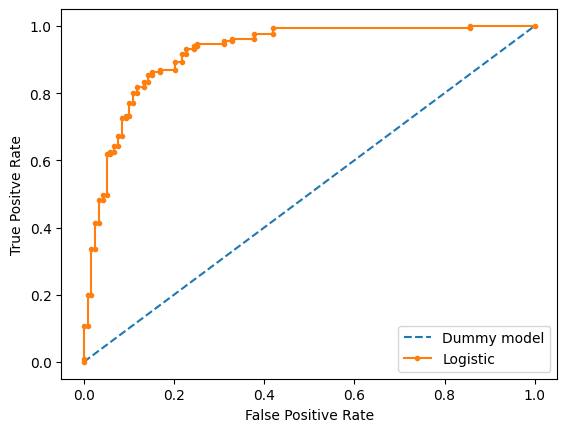

In [17]:
#### plot the roc curve for the model

pyplot.plot(dummy_fpr, dummy_tpr, linestyle = '--', label='Dummy model')
pyplot.plot(model_fpr, model_tpr, marker= '.', label='Logistic')

#axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positve Rate')

# show the legend
pyplot.legend()

#show the plot
pyplot.show()